# <center> Popularity versus similarity in growing networks </center>

### <center> Article by Papadopoulos et al. (2018) </center>

<div>
<center><img src="figs/elte_cimer_szines.jpg" width="500"/> </center>
</div>

##### <center> Recreation of method on real-life network </center>
<center> <i> 2021 spring. Kristóf Furuglyás </i> </center>


## <center> Table of contents </center>

- Introduction
- Methodical description
- Codes
- Summary

### <center> Introduction </center>

- Preferential attachment (Barabási & Albert)

$$
P\left(k\right) \sim k^{-\gamma}
$$
- Growing, scale-free networks


<div>
    <center><img src="figs/scfree.png" width="700"/> </center>
</div>


### <center> Introduction </center>

<center> Evolution of number of neighbours </center>
<div>
            <center><img src="figs/node_degree_t.png" width="500"/> </center>
</div>

### <center> Methodical description </center>

- PA is a consequence of other params (fitness, ranking, etc.)
- Popularity is one dimension of attractiveness, similarity is another
- Trade-off between popularity and similarity
- Optimization-driven network
- Geometric interpretation


### <center> Methodical description </center>

In each $t$ time, a new node appears with  $m$ new connections to the closest nodes in a hyperbolic space. The distance between that and another node connected at time $s$:

$$
    x_{st} = ln(st\theta_{st}),
$$

where $\theta_{st}$ is the angular difference. In every timestep, a node is drifting out from the origin:

$$
    r_s (t) = \beta r_s + (1-\beta) r_t,
$$

where $r_s = ln(s)$, $r_t = ln(t)$ and $\beta \in [0,1]$ is a drifting parameter.

### <center> Methodical description </center>

Every new nodes connect to a close one with probability 

$$
p(x_{st}) = \frac{1}{1 + e^{\frac{x_{st}-{R_t}}{T}}},
$$

where $R_t \approx r_t $ (controls average degree) and $T \in [0,\infty]$ is a parameter.

### <center> Methodical description </center>

<div>
    <center><img src="figs/hypemb_article_sub.jpg" width="500"/> </center>
</div>


### <center> Codes </center>


 <center> <i> Github repo  <a href="https://github.com/78furu/popularity_versus_similarity">here.</a> </i> </center>

In [1]:
import sys
sys.path.append('/home/kfuruglyas/Documents/popularity_versus_similarity/')

In [2]:
import networkx as nx

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.image as mpimg

from tqdm.notebook import tqdm
from scipy.optimize import curve_fit

In [4]:
from pvs import network_creation as nc

In [5]:
Nodes = nc.Nodes(n = 20, m = 3, T = 1, beta = 0.76)

In [6]:
img = mpimg.imread('figs/hypemb_article_sub.jpg')


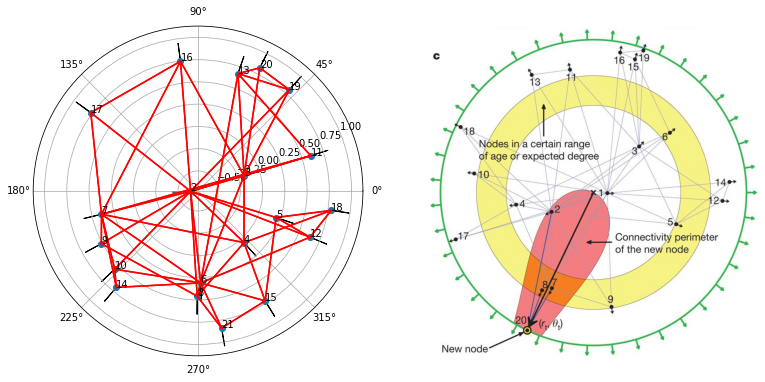

In [7]:
fig = plt.figure(figsize=(13, 10), facecolor = 'white')

ax = fig.add_subplot(121, polar=True)
ax = nc.Nodes.plotnodes(Nodes.nodes, .2, ax = ax )

ax = fig.add_subplot(122)
ax.imshow(img)
ax.set_axis_off()
plt.show()

### <center> Codes </center>


 <center> <i> Github repo  <a href="https://github.com/78furu/popularity_versus_similarity">here.</a> </i> </center>
 
#### <center> Recreating Facebook </center>

In [8]:
Nodes2 = nc.Nodes(n = 4039, m = 22, beta = 0.4,T = 1.55)

In [9]:
img2 = mpimg.imread('figs/facebook_colored_all_jac.png')
img3 = mpimg.imread('figs/fb_recreated.png')


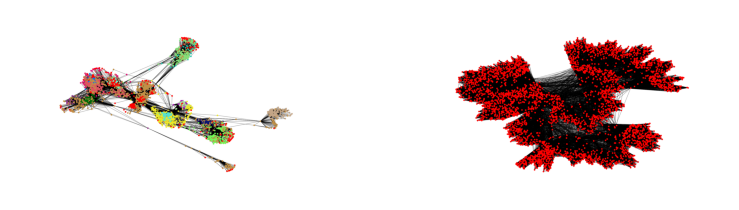

In [10]:
fig = plt.figure(figsize=(13, 10), facecolor = 'white')

ax = fig.add_subplot(121)
ax.imshow(img2)
ax.set_axis_off()

ax = fig.add_subplot(122)
ax.imshow(img3)
ax.set_axis_off()
plt.show()

### <center> Codes </center>


 <center> <i> Github repo  <a href="https://github.com/78furu/popularity_versus_similarity">here.</a> </i> </center>
 
#### <center> Recreating Facebook </center>

In [11]:
Nodes2.nodes_df.head()

,conns,theta,pos,num_of_edges
2,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",121.024907,0.540212,415
3,"[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",184.608414,0.702398,362
4,"[2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",112.200106,0.817471,294
5,"[2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",252.733786,0.906728,276
6,"[2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",309.412811,0.979657,258


In [12]:
Nodes2.nodes_df.tail()

,conns,theta,pos,num_of_edges
4036,"[1742, 127, 1655, 19, 382, 2837, 3405, 3098, 1...",351.398328,3.584157,23
4037,"[4011, 702, 1642, 958, 1961, 3412, 1390, 3597,...",26.337532,3.584256,22
4038,"[727, 230, 1196, 3230, 2219, 3021, 1053, 2533,...",76.822909,3.584355,22
4039,"[3044, 3945, 980, 3028, 3051, 1483, 3932, 1285...",240.096115,3.584454,22
4040,"[4036, 127, 1742, 382, 19, 1655, 2837, 3405, 3...",351.386934,3.584553,22


### <center> Codes </center>


 <center> <i> Github repo  <a href="https://github.com/78furu/popularity_versus_similarity">here.</a> </i> </center>
 
#### <center> Recreating Facebook </center>

In [13]:
G_fb = nx.read_edgelist("facebook_combined.txt")
G_re = Nodes2.to_networkx()

In [14]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [15]:
print(nx.info(G_re))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88458
Average degree:  43.8019


In [16]:
print(nx.average_clustering(G_fb))
print(nx.average_clustering(G_re))

0.6055467186200876
0.6588272629239271


In [17]:
print(nx.average_shortest_path_length(G_fb))
print(nx.average_shortest_path_length(G_re))

3.6925068496963913
3.2008950376228995


In [18]:
def power_law(x, gamma, c):
    return c*x**(-gamma)

In [19]:
degrees = np.array(list(dict(G_fb.degree()).values()))

In [20]:
bins = range(Nodes2.nodes_df.num_of_edges.min(),Nodes2.nodes_df.num_of_edges.max())

ydata, xdata = np.histogram(Nodes2.nodes_df.num_of_edges, bins = bins)
xdata = xdata[:-1]

datas = [(x,y) for x,y in zip(xdata, ydata) if y !=0]
xdata2, ydata2 = np.array([i[0] for i in datas]), np.array([i[1] for i in datas])

######################################
bins = range(degrees.min(),degrees.max())

ydata, xdata = np.histogram(degrees, bins = bins)
xdata = xdata[:-1]

datas = [(x,y) for x,y in zip(xdata, ydata) if y !=0 and 10<x<110]
xdata1, ydata1 = np.array([i[0] for i in datas]), np.array([i[1] for i in datas])

datas = [(x,y) for x,y in zip(xdata, ydata) if y !=0 and x]
xdata3, ydata3 = np.array([i[0] for i in datas]), np.array([i[1] for i in datas])

In [21]:
popt2, pcov2 = curve_fit(power_law, xdata2, ydata2)
popt1, pcov1 = curve_fit(power_law, xdata1, ydata1)

titles = ['FB original', 'FB recreated']


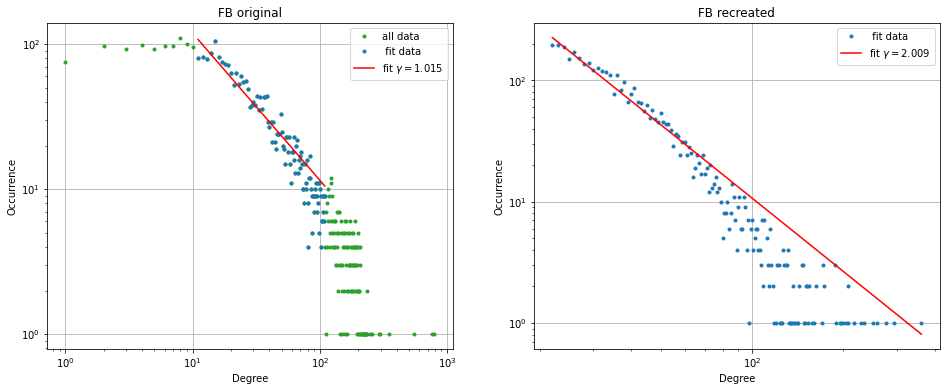

In [22]:
fig, axes = plt.subplots(1,2, figsize=(16, 6), facecolor = 'white')

axes[0].plot(xdata3, ydata3,'.',color = 'tab:green', label = 'all data')

for ax, xdata, ydata, popt, title in zip(axes.ravel(), \
                                         [xdata1, xdata2], [ydata1,ydata2], [popt1, popt2], titles):
    ax.plot(xdata, ydata, ".", label = ' fit data' )
    ax.plot(xdata, power_law(xdata, *popt), 'r-', label = fr"fit $\gamma = {popt[0]:.3f}$" )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(); ax.legend()
    ax.set_xlabel('Degree')
    ax.set_ylabel('Occurrence')
    ax.set_title(title)



In [24]:
samples = [[j for j in Nodes2.nodes[i]["conns"] if j>i] for i in range(2,10)]
samples2 = [[j for j in Nodes2.nodes[i]["conns"] if j>i] for i in range(500,509)]


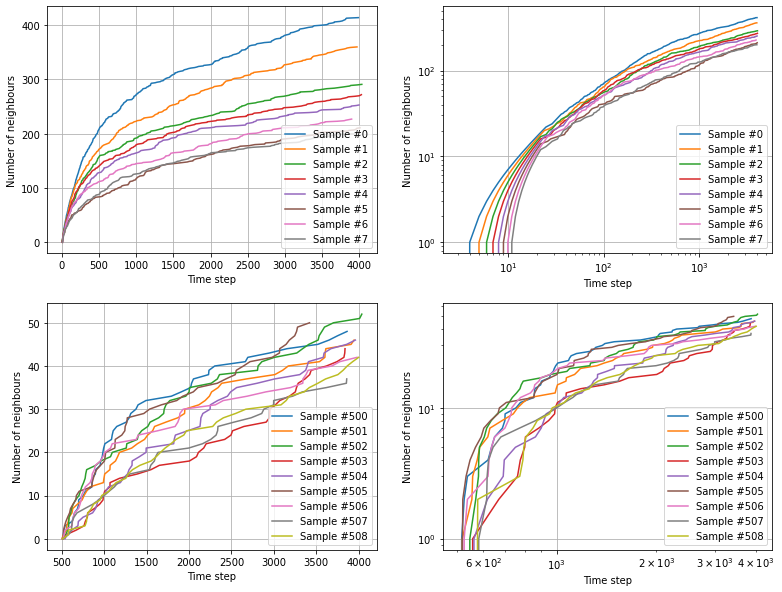

In [25]:
fig, axes = plt.subplots(2,2, figsize=(13,10))

for ax in axes[0].ravel():
    for c, sample in enumerate(samples):
        ax.plot(sample, range(len(sample)), label = f'Sample #{c}' )
        ax.grid(True); ax.legend()
        ax.set_xlabel("Time step")
        ax.set_ylabel('Number of neighbours')

ax = axes[0, 1]
ax.set_yscale('log')
ax.set_xscale('log')

for ax in axes[1].ravel():
    for c, sample in enumerate(samples2):
        ax.plot(sample, range(len(sample)), label = f'Sample #{c + 500}' )
        ax.grid(True); ax.legend()
        ax.set_xlabel("Time step")
        ax.set_ylabel('Number of neighbours')
        
ax = axes[1, 1]
ax.set_yscale('log')
ax.set_xscale('log')

### <center> Summary </center>

- Recreated FB
- $\left< k\right>$ and clustering coeff fits
- $\gamma$ does not match

# <center>  Thank you for your attention!</center>